In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8134840257407852852
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4410084873120137574
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# Inspecting our data

In [4]:
print("Initial shape or dimensions of x_train : " + str(x_train.shape))

print("Number of samples in our training data : " + str(len(x_train)))
print("Number of labels in our training data : " + str(len(y_train)))
print("Number of samples in our test data : " + str(len(x_test)))
print("Number of labels in our test data : " + str(len(y_test)))


Initial shape or dimensions of x_train : (60000, 28, 28)
Number of samples in our training data : 60000
Number of labels in our training data : 60000
Number of samples in our test data : 10000
Number of labels in our test data : 10000


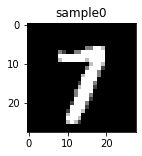

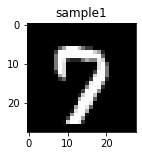

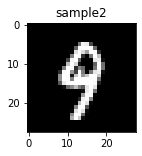

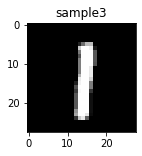

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title, image = None, size = 6):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size*aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

for i in range(0,4):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  imshow(f"sample{i}", img, size = 2)

# Preprocessing our dataset

In [6]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (60000, 28, 28, 1)
x_test shape :  (10000, 28, 28, 1)


# One hot encode our labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

num_classes = y_test.shape[1]

y_train :  (60000, 10)
y_test :  (10000, 10)


In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Building the model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# Training the model

In [11]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Epoch 1/25
469/469 [==============================] - 12s 10ms/step - loss: 2.2464 - accuracy: 0.3649 - val_loss: 2.1670 - val_accuracy: 0.4870
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 1.9569 - accuracy: 0.6081 - val_loss: 1.5651 - val_accuracy: 0.7387
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 1.0354 - accuracy: 0.7927 - val_loss: 0.6396 - val_accuracy: 0.8440
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.5431 - accuracy: 0.8556 - val_loss: 0.4409 - val_accuracy: 0.8790
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4255 - accuracy: 0.8804 - val_loss: 0.3715 - val_accuracy: 0.8983
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3753 - accuracy: 0.8926 - val_loss: 0.3360 - val_accuracy: 0.9057
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3457 - accuracy: 0.9013 - val_loss: 0.3135 - val_accuracy: 0.9104
Epoc

In [12]:
history_dict = history.history
history_dict

{'loss': [2.2463934421539307,
  1.9568601846694946,
  1.0353745222091675,
  0.5431379675865173,
  0.4255366623401642,
  0.37527093291282654,
  0.3457314372062683,
  0.3254430890083313,
  0.3099993169307709,
  0.2972635328769684,
  0.2860521376132965,
  0.27580758929252625,
  0.26653265953063965,
  0.2576633393764496,
  0.24895519018173218,
  0.24082446098327637,
  0.23307980597019196,
  0.22571252286434174,
  0.2187507599592209,
  0.2119492143392563,
  0.20580609142780304,
  0.1998569518327713,
  0.19403308629989624,
  0.18875552713871002,
  0.18364101648330688],
 'accuracy': [0.3648500144481659,
  0.6080999970436096,
  0.7927166819572449,
  0.8555999994277954,
  0.8804166913032532,
  0.8925999999046326,
  0.9013000130653381,
  0.9065666794776917,
  0.9108999967575073,
  0.9140166640281677,
  0.9168333411216736,
  0.9205499887466431,
  0.9222999811172485,
  0.9249666929244995,
  0.9282833337783813,
  0.9305999875068665,
  0.9330333471298218,
  0.9346166849136353,
  0.937250018119812,
 

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [18]:
model.save("/content/drive/MyDrive/Saved Models/mnist_tf_cnn.h5")
print("model saved")

model saved


In [15]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_tf_cnn.h5')

In [16]:
print("predicting classes for all 10000 test images")
pred = np.argmax(classifier.predict(x_test), axis=-1)
print("completed")

print(pred)
print(type(pred))
print(len(pred))

predicting classes for all 10000 test images
313/313 [==============================] - 1s 2ms/step
completed
[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


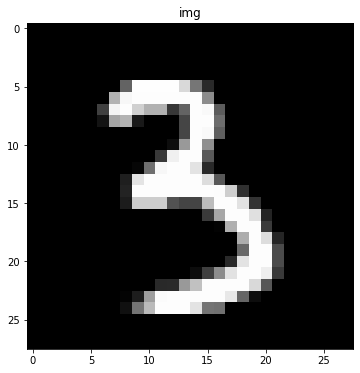

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 62ms/step
[3]
<class 'numpy.ndarray'>
1


In [17]:
input_img = x_test[32]
imshow('img', input_img)
print(input_img.shape)

input_img = input_img.reshape(1, 28, 28, 1)
print(input_img.shape)

pred = np.argmax(classifier.predict(input_img), axis=-1)
print(pred)
print(type(pred))
print(len(pred))